# Mount the Google Drive


In [2]:
# connecting to drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Install Necessery Library

#Import Library

In [3]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from keras.callbacks import Callback
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
import tensorflow as tf
from tensorflow import keras
import os
import time
import cv2
from sklearn.metrics import cohen_kappa_score
print("All Library Loaded sucessfully to this notebook instance")

All Library Loaded sucessfully to this notebook instance


# Result Analysis


In [4]:
df = pd.read_csv("/content/drive/My Drive/Brain Tumour Detection/Dataset/result_df_final.csv")
df

,Algorithm,Accuracy,Error rate,Precision,Recall,F1 score
0,K-Nearest Neighbor Algorithm,72.580645,27.419355,73.183761,72.580645,72.401152
1,Logistic Regression Algorithm,50.000000,50.000000,25.000000,50.000000,33.333333
2,GaussianNB Algorithm,67.741935,32.258065,68.432432,67.741935,67.436975
3,Random Forest Algorithm,85.483871,14.516129,85.520833,85.483871,85.480094
4,RandomForestClassifier Algorithm Hyperparameter,87.096774,12.903226,87.096774,87.096774,87.096774


In [5]:
algo_name = list(df['Algorithm'])
abbr_algo_name = ["EFNet-KNN","EFNet-LR","EFNet-GNB","EFNet-RFC","EFNet_RFC_Tuned"]
df['Algorithm'] = abbr_algo_name
df

,Algorithm,Accuracy,Error rate,Precision,Recall,F1 score
0,EFNet-KNN,72.580645,27.419355,73.183761,72.580645,72.401152
1,EFNet-LR,50.000000,50.000000,25.000000,50.000000,33.333333
2,EFNet-GNB,67.741935,32.258065,68.432432,67.741935,67.436975
3,EFNet-RFC,85.483871,14.516129,85.520833,85.483871,85.480094
4,EFNet_RFC_Tuned,87.096774,12.903226,87.096774,87.096774,87.096774


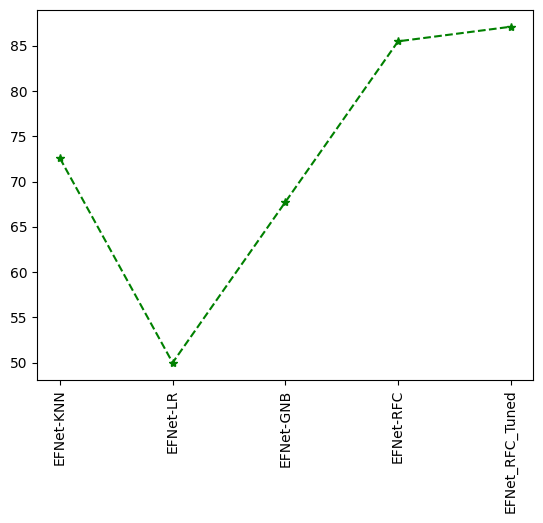

In [6]:
plt.xticks(rotation=90)
plt.plot('Algorithm', 'Accuracy','--*',data=df,color='green')

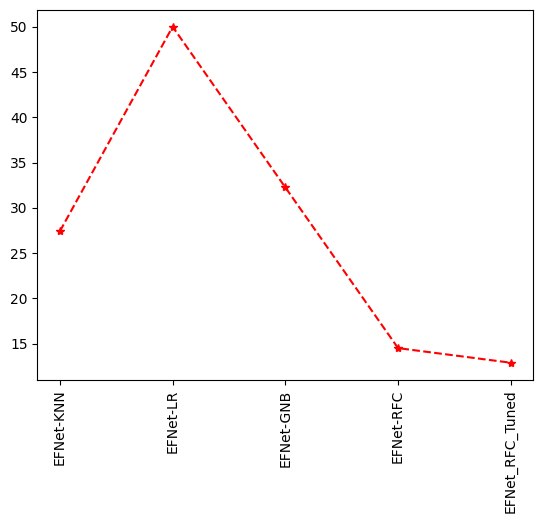

In [7]:
plt.xticks(rotation=90)
plt.plot('Algorithm', 'Error rate','--*',data=df,color='red')

In [8]:
# accuracy of count vector
import pandas as pd
if isinstance(df, (pd.DatetimeIndex, pd.MultiIndex)):
    df = df.to_frame(index=False)

df = df.reset_index().drop('index', axis=1, errors='ignore')
df.columns = [str(c) for c in df.columns]
chart_data = pd.concat([
    df['Algorithm'],
    df['Accuracy'],
    df['Error rate'],
    df['Precision'],
    df['Recall'],
    df['F1 score'],
], axis=1)
chart_data = chart_data.sort_values(['Algorithm'])
chart_data = chart_data.rename(columns={'Algorithm': 'x'})
chart_data = chart_data.dropna()

import plotly.graph_objs as go

charts = []
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['Accuracy'],
    name='Accuracy'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['Error rate'],
    name='Error rate'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['Precision'],
    name='Precision'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['Recall'],
    name='Recall'
))
charts.append(go.Bar(
    x=chart_data['x'],
    y=chart_data['F1 score'],
    name='F1 score'
))
figure = go.Figure(data=charts, layout=go.Layout({
    'barmode': 'group',
    'legend': {'orientation': 'h', 'y': -0.3},
    'title': {'text': 'Accuracy, Error rate, Precision, Recall, F1 score by Model_Name'},
    'xaxis': {'title': {'text': 'Model_Name'}},
    'yaxis': {'title': {'text': 'Accuracy, Error rate, Precision, Recall, F1 score'}, 'type': 'linear'}
}))
figure.show(renderer="colab")

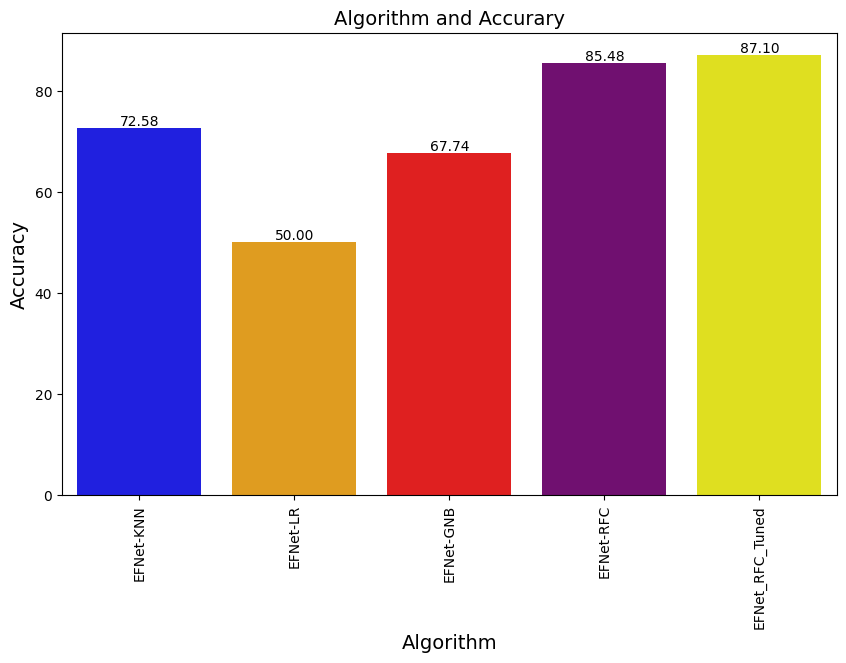

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
# Data
categories = df['Algorithm']
values = df['Accuracy']

# Set the font scale

# Define custom color palette
# colors = ['blue', 'orange', 'green', 'red']
colors = ['blue', 'orange','red', 'purple', 'yellow', 'cyan','green']

# Create bar plot with custom color palette
sns.barplot(x=categories, y=values, palette=colors)

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Algorithm and Accurary',fontsize=14)

# Adding values on top of bars
for index, value in enumerate(values):
    plt.text(index, value + 0.5, '{:.2f}'.format(value), ha='center')

# Add title to x-axis
plt.gca().set_xlabel('Algorithm', fontsize=14)
plt.gca().set_ylabel('Accuracy', fontsize=14)
plt.xticks(rotation=90)
sns.set(font_scale=1)

# Display the plot
plt.show()

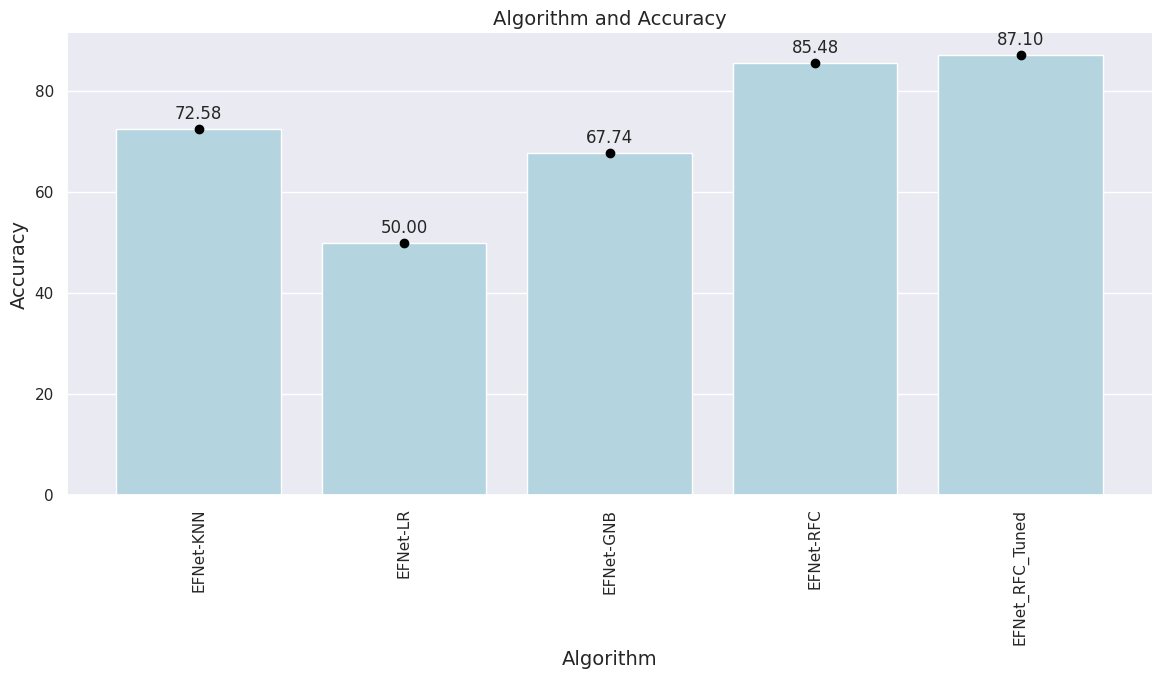

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 6))
# Data
categories = df['Algorithm']
values = df['Accuracy']


# Create bar plot with custom color palette
ax = sns.barplot(x=categories, y=values, color='lightblue')


# Adding values on top of bars
for index, value in enumerate(values):
    plt.text(index, value + 2, '{:.2f}'.format(value), ha='center')

# Calculate the center of each bar
bar_centers = [rect.get_x() + rect.get_width() / 2 for rect in ax.patches]

# Plot black dots at the center of the bars
plt.plot(bar_centers, values, marker='o', color='black', linestyle='')

# Remove the lines from the line graph
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adding labels and title
plt.xlabel('Algorithms')
plt.ylabel('Accuracy')
plt.title('Algorithm and Accuracy',fontsize=14)

# Add title to x-axis
plt.gca().set_xlabel('Algorithm', fontsize=14)
plt.gca().set_ylabel('Accuracy', fontsize=14)

plt.xticks(rotation=90)

# Display the plot
plt.show()


In [11]:
df.columns

Index(['Algorithm', 'Accuracy', 'Error rate', 'Precision', 'Recall',
       'F1 score'],
      dtype='object')

In [12]:
list(df['Algorithm'])

['EFNet-KNN', 'EFNet-LR', 'EFNet-GNB', 'EFNet-RFC', 'EFNet_RFC_Tuned']

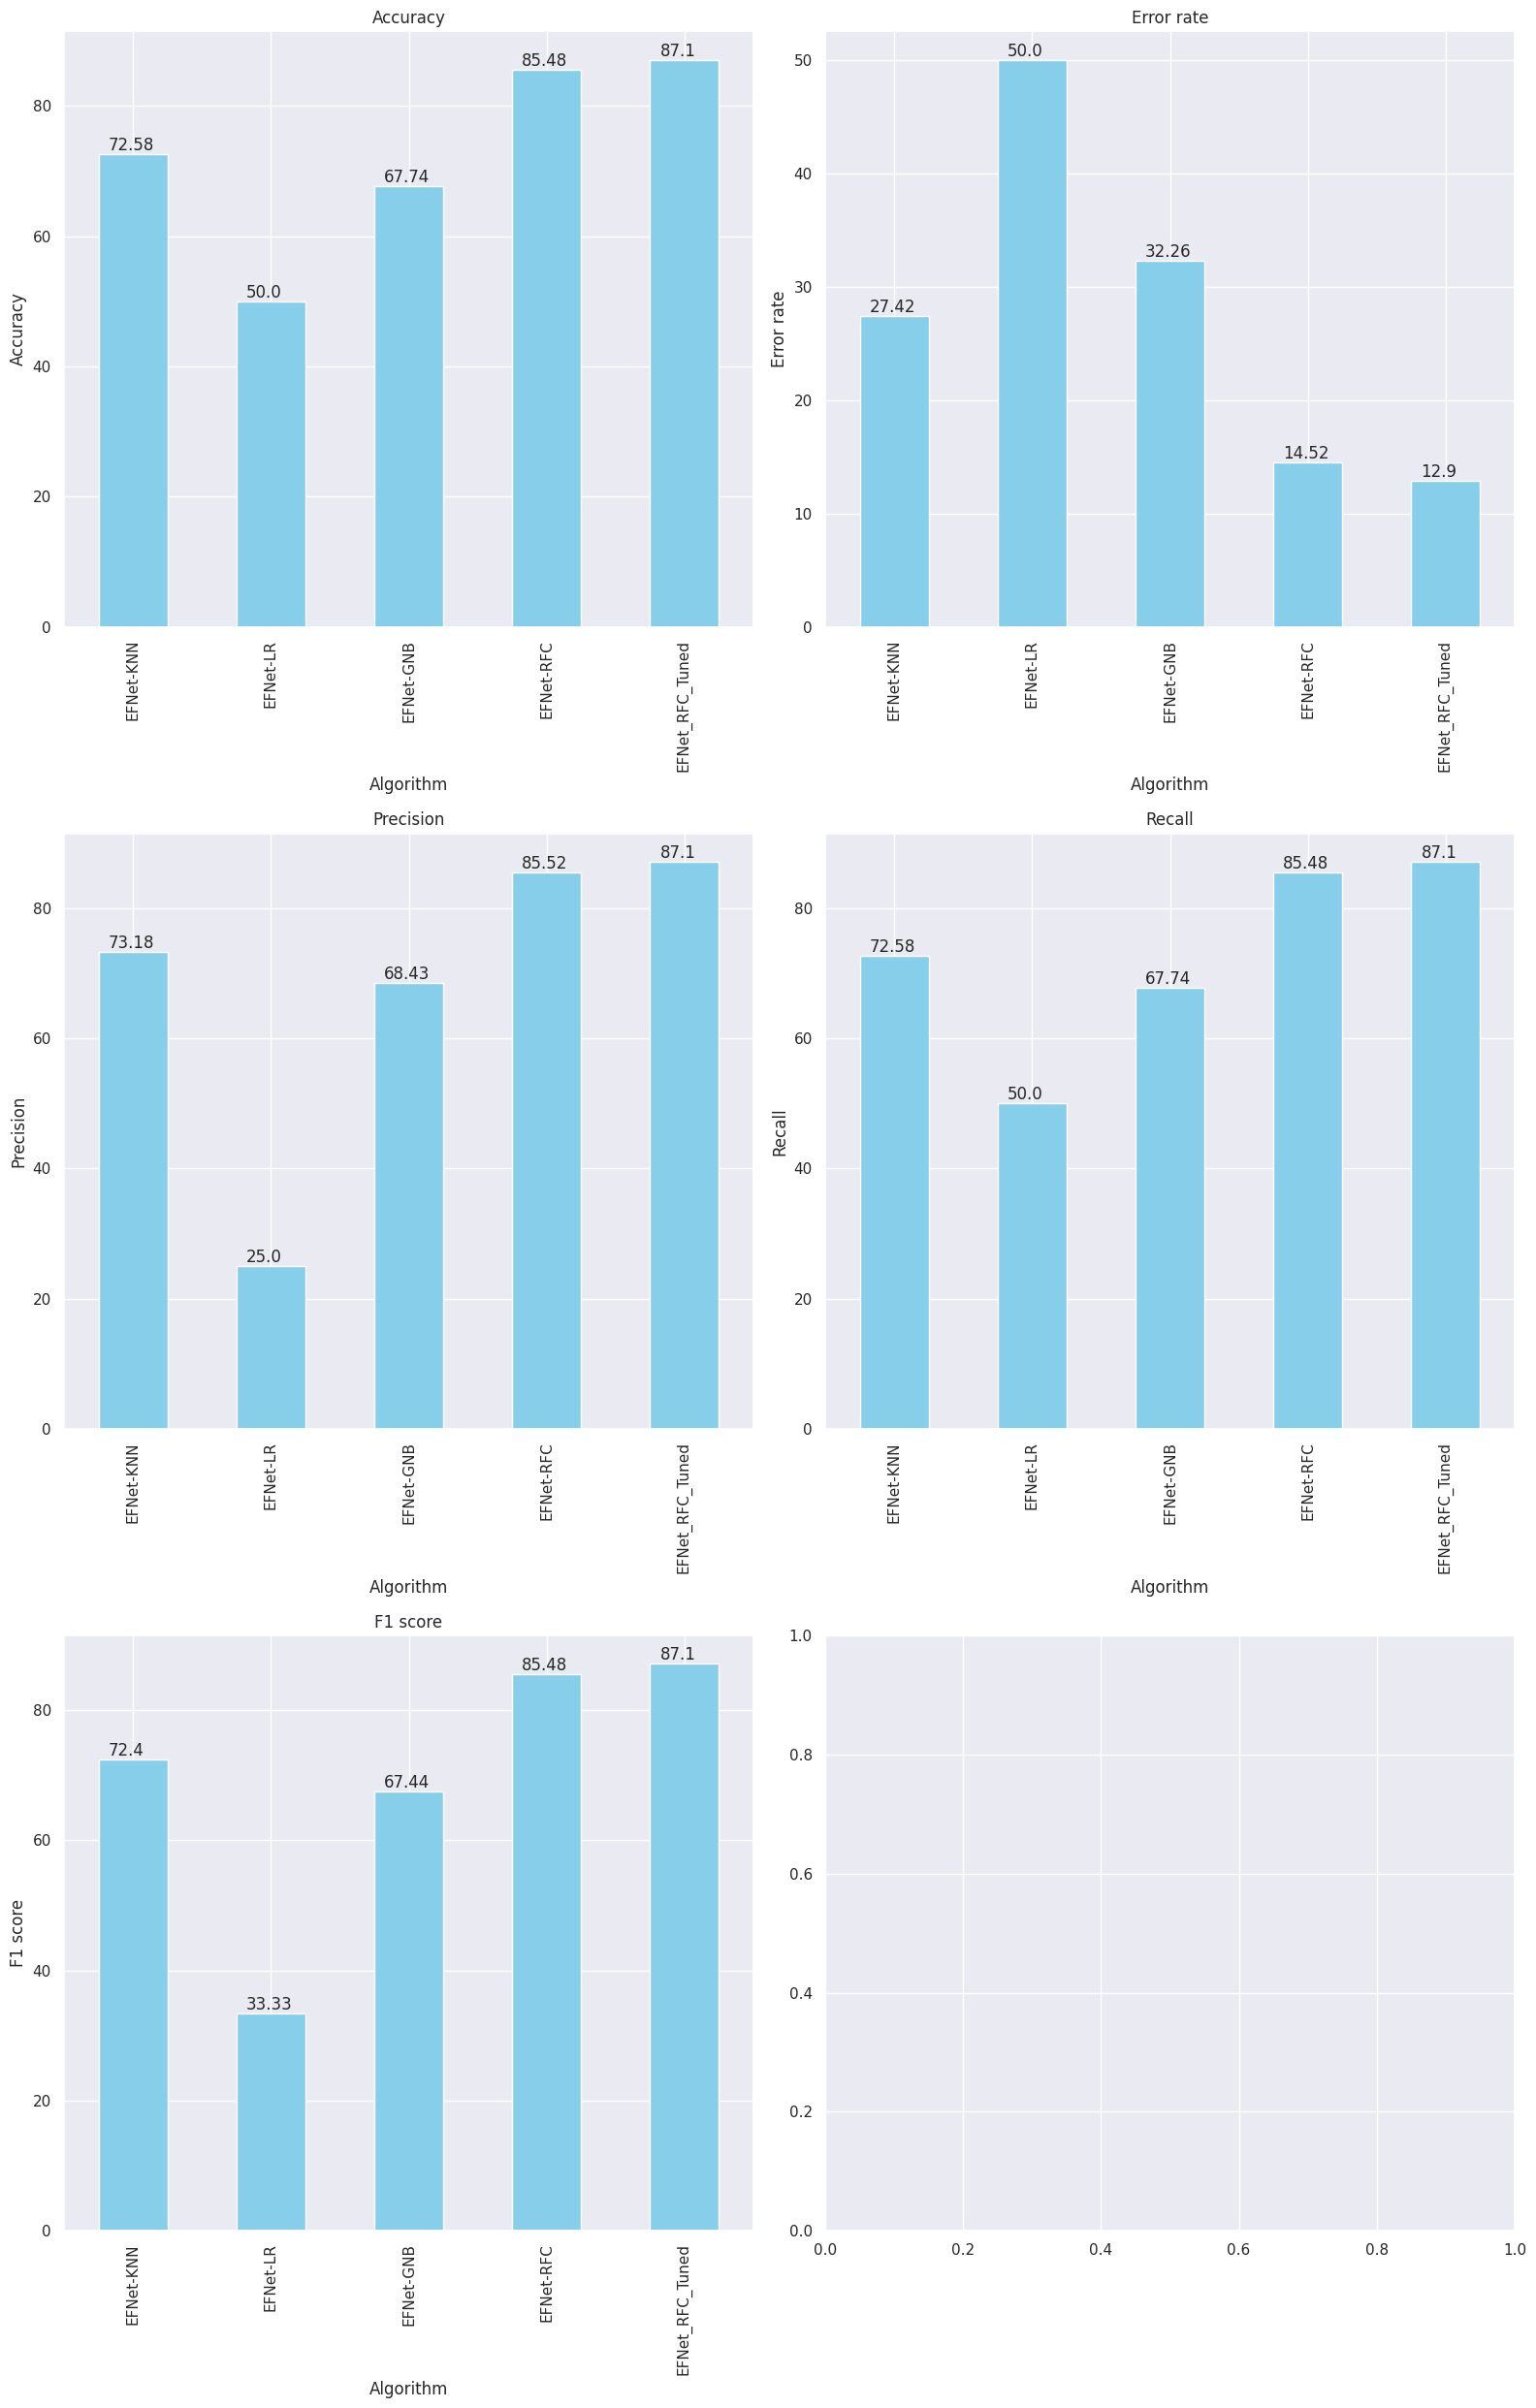

In [13]:
import pandas as pd
import matplotlib.pyplot as plt

# Your DataFrame
data = {
    "Algorithm": list(df['Algorithm']),
    "Accuracy": list(df['Accuracy']),
    "Error rate": list(df['Error rate']),
    "Precision": list(df['Precision']),
    "Recall": list(df['Recall']),
    "F1 score": list(df['F1 score']),
    }

data = pd.DataFrame(data)

# Set Algorithm column as index
data.set_index('Algorithm', inplace=True)

# Plotting
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 25))

for col, ax in zip(data.columns, axes.flatten()):
    bars = data[col].plot(kind='bar', ax=ax, color='skyblue')
    ax.set_title(col)
    ax.set_xlabel('Algorithm')
    ax.set_ylabel(col)

    # Adding values on top of bars
    for bar in bars.patches:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/7, yval, round(yval, 2), va='bottom')

plt.tight_layout()
plt.show()
